## Business case:
    we here predict whether the customer is going to exit the particular product or from the bank itself nothing but churn analysis

In [1]:
pip install tensorflow-gpu

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\mskir\AppData\Local\Temp\pip-install-n02hoomv\tensorflow-gpu_b25415b58822406983bc6ac4512515f3\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflow-gpu did not

In [3]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [4]:
#import some basic libraries
import numpy as np
import matplotlib as ply
import pandas as pd

In [6]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
#we divide the datsets to dependent and independent features
x= dataset.iloc[:,3:13] #here we are taking all row and removing starting columns
y = dataset.iloc[:,13] #here we are taking only one that is output column

In [8]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [12]:
#we need to remove the catregorical valyes
#so we use feature engineering
geography= pd.get_dummies(x['Geography'], drop_first=True)
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [13]:
gender= pd.get_dummies(x['Gender'], drop_first=True)
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [17]:
#cancatinate variables with dataframe
#so we drop gender and geograpy
x = x.drop(['Geography','Gender'], axis = 1) #we write axis beacuse we are droppingthe columns not rows

In [18]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [21]:
x = pd.concat([x,geography,gender], axis=1)

In [24]:
#bow we do train test split
#Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [25]:
#feature scaling 
from sklearn.preprocessing import StandardScaler #minmaxscaler canbe used with cnn
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [27]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [28]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [30]:
x_train.shape

(8000, 11)

### Part2 : Lets create the ANN

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [33]:
 #lets initialise teh ANN
classifier = Sequential()

In [35]:
#adding the input layer
classifier.add(Dense(units=11, activation='relu')) #we are taking 11 units as we have 11 columns

In [36]:
#adding the first hiddden layer 
classifier.add(Dense(units=7, activation='relu')) #we are taking 7 randomly but there are techniques to select the sie of hidden layers

In [38]:
#adding the second hidden layer
classifier.add(Dense(units=6, activation='relu'))

In [39]:
#adding the output layer 
classifier.add(Dense(1,activation='sigmoid')) #sigmoid because we have binary classification

In [40]:
#train neural network
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])
#there is no learning rate becasue adam use defaut laerning rate or we can do as below

In [41]:

import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)


In [43]:
model_history = classifier.fit(x_train,y_train,validation_split=0.33, batch_size=10, epochs=1000)

Epoch 1/1000
536/536 [==============================] - 6s 8ms/step - loss: 0.5146 - accuracy: 0.7796 - val_loss: 0.4435 - val_accuracy: 0.8099
Epoch 2/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4273 - accuracy: 0.8127 - val_loss: 0.4259 - val_accuracy: 0.8217
Epoch 3/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.4119 - accuracy: 0.8214 - val_loss: 0.4160 - val_accuracy: 0.8217
Epoch 4/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3994 - accuracy: 0.8308 - val_loss: 0.4054 - val_accuracy: 0.8300
Epoch 5/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3878 - accuracy: 0.8421 - val_loss: 0.3972 - val_accuracy: 0.8270
Epoch 6/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3756 - accuracy: 0.8436 - val_loss: 0.3844 - val_accuracy: 0.8360
Epoch 7/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3647 - accuracy: 0.8522 - val_loss: 0.3719 - val_accuracy:

KeyboardInterrupt: 

In [ ]:
#we can do ealry stopping when the model accuracy not at all is increasing like in above situation

In [45]:
#early_stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1, 
    mode="auto",
    baseline=None,
    restore_best_weights=False,
   
)

In [46]:
model_history = classifier.fit(x_train,y_train,validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping) #now callbacks calls fo early stopping

Epoch 1/1000
536/536 [==============================] - 4s 8ms/step - loss: 0.3200 - accuracy: 0.8673 - val_loss: 0.3586 - val_accuracy: 0.8591
Epoch 2/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3205 - accuracy: 0.8655 - val_loss: 0.3600 - val_accuracy: 0.8588
Epoch 3/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3202 - accuracy: 0.8673 - val_loss: 0.3617 - val_accuracy: 0.8565
Epoch 4/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3208 - accuracy: 0.8653 - val_loss: 0.3583 - val_accuracy: 0.8588
Epoch 5/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3199 - accuracy: 0.8671 - val_loss: 0.3569 - val_accuracy: 0.8588
Epoch 6/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3187 - accuracy: 0.8690 - val_loss: 0.3611 - val_accuracy: 0.8580
Epoch 7/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3189 - accuracy: 0.8681 - val_loss: 0.3612 - val_accuracy:

In [47]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

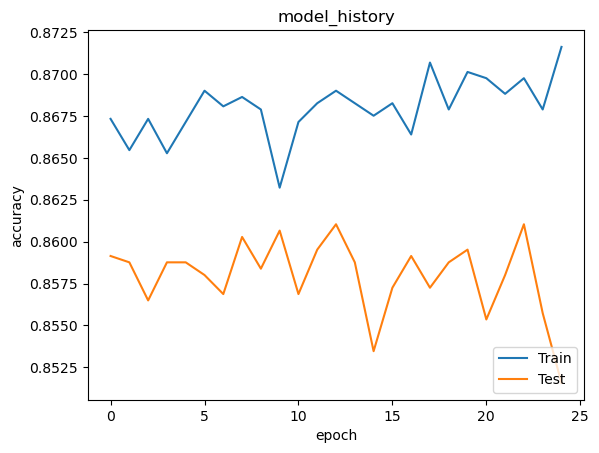

In [52]:
#summarise the history for accuracy
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_history')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='lower right')
plt.show()

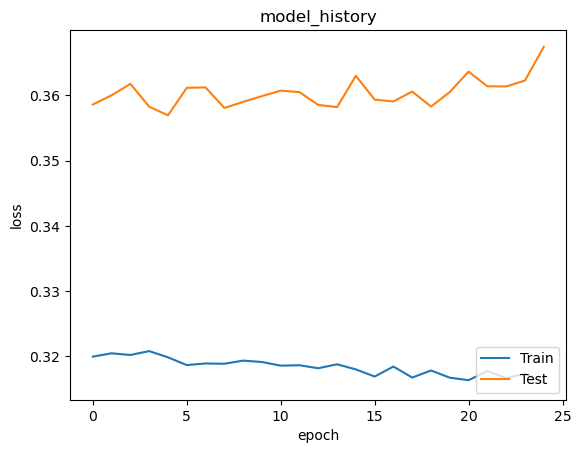

In [53]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_history')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='lower right')
plt.show()

### Part3: Making the predictions and evaluating the model

In [54]:
#next step is pedicting using test data
y_pred = classifier.predict(x_test)
y_pred = (y_pred>=0.5)

63/63 [==============================] - 1s 5ms/step


In [55]:
#now we have to make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1466,  129],
       [ 175,  230]], dtype=int64)

In [57]:
#calcualte the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

0.848

In [59]:
#where can we see the weights
classifier.get_weights()

[array([[ 5.38485125e-02,  2.60620475e-01, -6.99439719e-02,
          2.62931943e-01, -4.16088151e-03, -1.38133578e-02,
          8.69309232e-02, -1.01955072e-03, -4.38524596e-02,
          9.27476883e-02, -2.84527481e-01],
        [-4.53197956e-01,  9.07277465e-02,  8.93171430e-01,
         -7.66640365e-01, -7.39417598e-02,  3.04432809e-01,
          6.82178140e-03,  6.61808670e-01,  9.40910876e-01,
          3.02872956e-01, -4.67964202e-01],
        [ 3.27793583e-02,  3.79180193e-01,  4.43954915e-02,
         -6.80159181e-02, -1.76436938e-02,  1.81880072e-01,
         -5.38062677e-02, -3.17687005e-01, -2.60482244e-02,
          5.74660748e-02,  2.79383156e-02],
        [ 6.09511197e-01, -7.25296676e-01,  1.30777866e-01,
         -3.69838774e-01, -7.96017945e-01, -7.05579400e-01,
         -4.08878118e-01,  6.99479580e-01, -1.52698815e-01,
          5.05879343e-01, -4.18154091e-01],
        [-3.59565854e-01,  3.55056627e-03, -5.62283695e-02,
          3.57973009e-01, -4.73534346e-01, -

In [ ]:
#we can save the model using pickling